{'3d_mins': [18.143685221476957, 18.166654960595995, 18.2993674205547, 18.377801989361032, 18.44912274486346, 18.44171937688868, 18.420745545951736, 18.384466502184384, 18.45066823025574, 18.435651065234197, 18.426700095827297, 18.419952415882104, 18.417672095826198, 18.415302805807993, 18.422618710151152, 18.40431408868108, 18.41820434202816, 18.417676275265386, 18.417484696986783, 18.416787189755524, 18.39678238918093, 18.37332070322322, 18.398714023732765, 18.398171468163433, 18.389568757845165, 18.377354325875594, 18.389125470687183, 18.37514617446463, 18.390555432179717, 18.380856796756152, 18.379661531236874, 18.375172012996796, 18.38561206086096, 18.37458064417176, 18.38513549555847, 18.377624810530378, 18.393225640682168, 18.37568113872497, 18.472843817083056, 18.47197639722851, 18.45326797764965, 18.443328492217987, 18.45372734675799, 18.445108079326115, 18.522165980222855, 18.43399239273591, 18.513587529605683, 18.501067845504654, 18.493826620613895, 18.43562723227942, 18.462

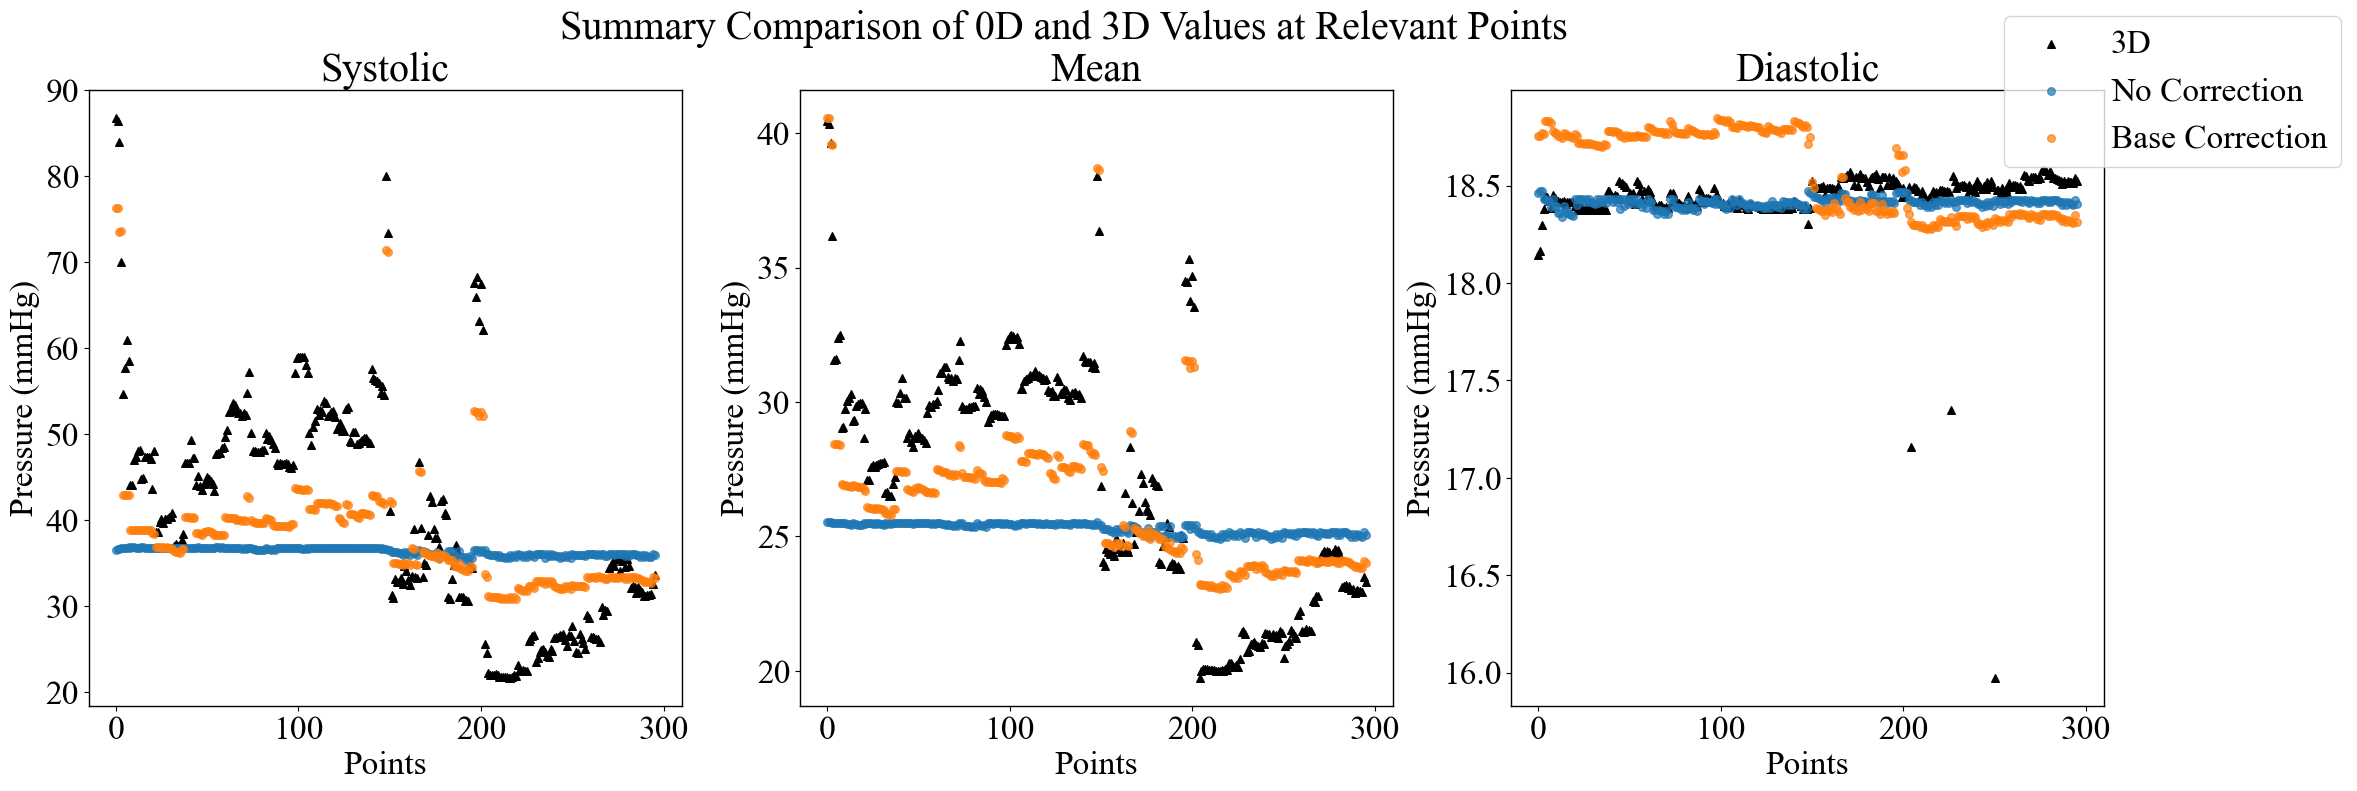

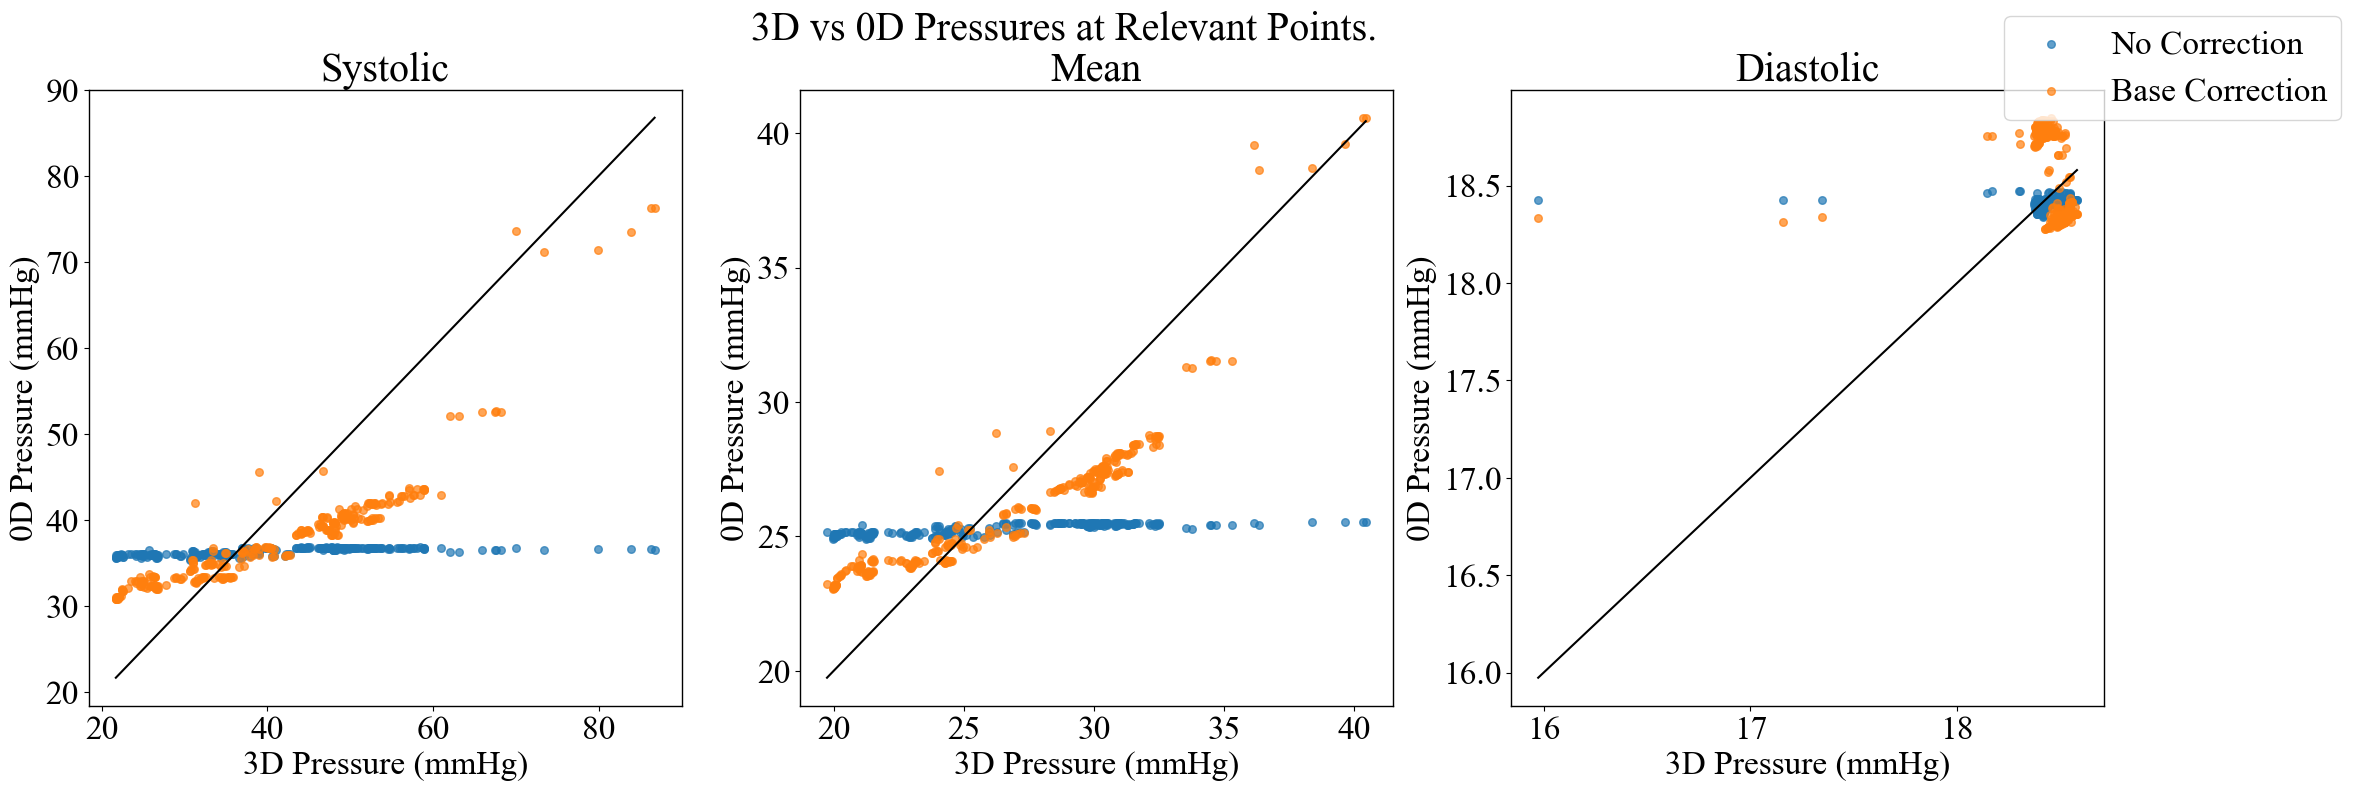

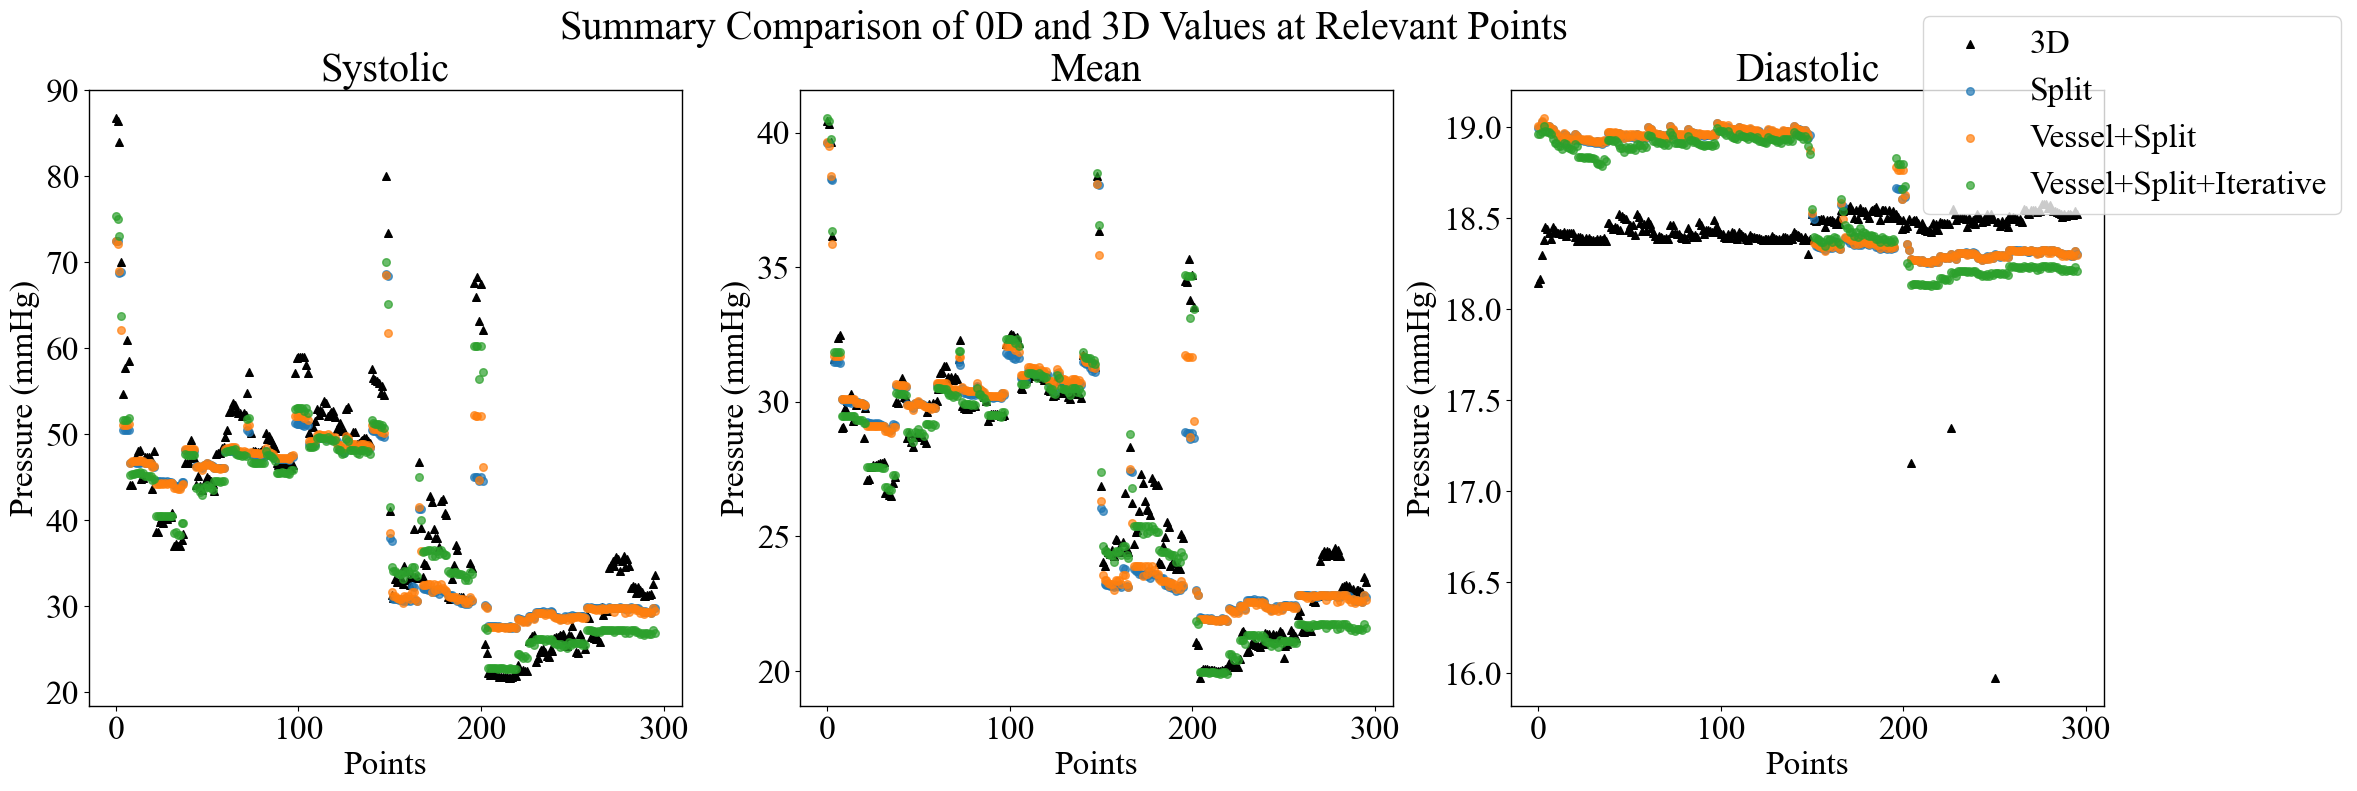

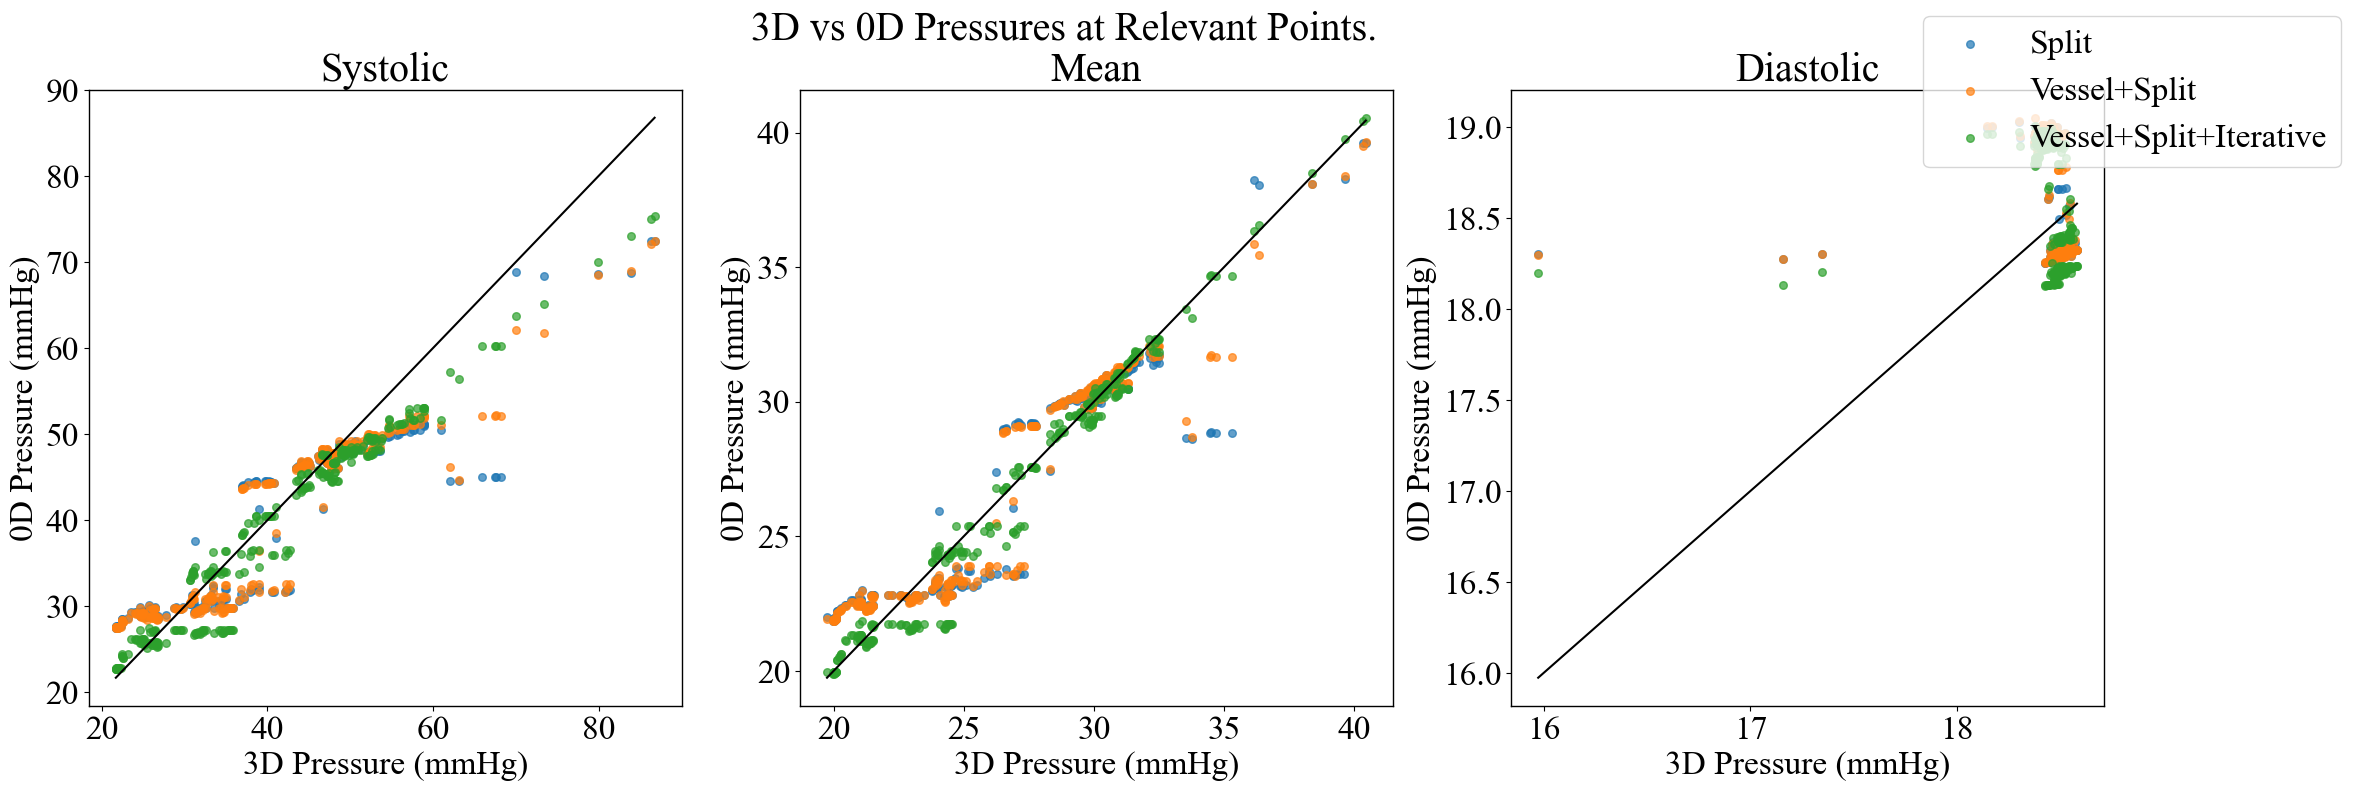

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


def set_params(font = "Times New Roman", size = 18, linewidth = 1):
    """Converts global parameters

    Args:
        font (str, optional): font. Defaults to "Helvetica Neue".
        size (int, optional): size of font. Defaults to 18.
        linewidth (int, optional): width of axes lines. Defaults to 2.
    """
    # Edit the font, font size, and axes width
    matplotlib.rcParams['font.family'] = font
    plt.rcParams['font.size'] = size
    plt.rcParams['axes.linewidth'] = linewidth
    

def plot_valid2(threed_data, zerod_data):
    
    results_3d = np.load(threed_data, allow_pickle=True).item()
    print(results_3d)
    threed_mins = results_3d['3d_mins']
    threed_maxs = results_3d['3d_maxs']
    threed_means = results_3d['3d_means']
    
    
    fig1, ax1 = plt.subplots(1, 3, figsize=(26, 8), )
    fig2, ax2 = plt.subplots(1, 3, figsize=(26, 8))
    fig1.suptitle("Summary Comparison of 0D and 3D Values at Relevant Points")
    s = 30
    ax1[1].scatter(range(len(threed_means)), threed_means, s =s, color = "black", marker='^', label = '3D')
    ax1[1].set_title("Mean")
    ax1[1].set_ylabel("Pressure (mmHg)")
    ax1[1].set_xlabel("Points")
    
    ax1[0].scatter(range(len(threed_maxs)), threed_maxs, s =s,color = "black", marker='^',label = '3D')
    ax1[0].set_title("Systolic")
    ax1[0].set_ylabel("Pressure (mmHg)")
    ax1[0].set_xlabel("Points")
    
    
    ax1[2].scatter(range(len(threed_mins)), threed_mins,s =s,color = "black", marker='^', label = '3d')
    ax1[2].set_title("Diastolic")
    ax1[2].set_ylabel("Pressure (mmHg)")
    ax1[2].set_xlabel("Points")

    
    fig2.suptitle("3D vs 0D Pressures at Relevant Points.")
    ax2[0].plot([min(threed_maxs), max(threed_maxs)], [min(threed_maxs), max(threed_maxs)], 'black')
    ax2[0].set_title("Systolic")
    ax2[1].plot([min(threed_means), max(threed_means)], [min(threed_means), max(threed_means)], 'black')
    ax2[1].set_title("Mean")
    ax2[2].plot([min(threed_mins), max(threed_mins)], [min(threed_mins), max(threed_mins)], 'black')
    ax2[2].set_title("Diastolic")
    for i in range(3):
        ax2[i].set_ylabel("0D Pressure (mmHg)")
        ax2[i].set_xlabel("3D Pressure (mmHg)")
    

    zerod = np.load(zerod_data, allow_pickle=True).item()
    
    for name, results_0d in zerod.items():
        zerod_mins = results_0d['0d_mins']
        zerod_maxs = results_0d['0d_maxs']
        zerod_means = results_0d['0d_means']
        ## Summary Statistics
        
        ## means
        ax1[1].scatter(range(len(zerod_means)), zerod_means,s =s, label = name, alpha = .7)
        
        ## systolic
        ax1[0].scatter(range(len(zerod_maxs)), zerod_maxs, s =s,label = name, alpha = .7)
        
        # diastolic
        ax1[2].scatter(range(len(zerod_mins)), zerod_mins,s =s, label = name, alpha = .7)
        
        ## plot 3D on x axis, and 0D on y axis
        ax2[0].scatter(threed_maxs, zerod_maxs,s =s, label = name, alpha = .7)
        ax2[1].scatter(threed_means, zerod_means,s =s, label = name, alpha = .7)
        ax2[2].scatter(threed_mins, zerod_mins, s =s,label = name, alpha = .7)

        


    handles, labels = ax1[0].get_legend_handles_labels()
    fig1.legend(handles, labels, loc='upper right')
    handles, labels = ax2[0].get_legend_handles_labels()
    fig2.legend(handles, labels, loc='upper right')
    
    return fig1, fig2

if __name__ == '__main__':
    set_params(size=24)
    fig1, fig2 = plot_valid2('3d_data_f6.npy', '0d_data_f6.npy')
    fig3, fig4 = plot_valid2('3d_data_f7.npy', '0d_data_f7.npy')
    
    fig1.savefig("f6.1.png")
    fig2.savefig("f6.2.png")
    fig3.savefig("f7.1.png")
    fig4.savefig("f7.2.png")